In [1]:
import pandas as pd  # Loading neccssary packages 
import numpy as np
import seaborn as sns
dataset = pd.read_csv("Global YouTube Statistics.csv",encoding='latin-1') # read CSV file
dataset.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [2]:
dataset.info() # getting info about the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [3]:
dataset.isnull().sum() # check if null value present in each col

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [4]:
dataset.fillna("NA",inplace=True) # replace null with NA

In [5]:
dataset.isnull().sum() # now there is no null value in the dataset

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

In [6]:
# Since country already available, Lat, long again give country specific co-ordinates, hence dropping that
dataset.drop(["Title","Abbreviation"],axis=1,inplace=True)

In [7]:
temp= dataset["rank"] == "rank"
dataset[temp] # checking for duplicate records but nothing found

,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,country_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude


In [8]:
# segreggating Quantiative , Qualitative values seperately 
Quan = []
Qual = []

for ColumnName in dataset.columns:
            #print(ColumnName)
    if (dataset[ColumnName].dtypes == 'O'):
            Qual.append(ColumnName)
    else:
            Quan.append(ColumnName)

In [9]:
Qual

['Youtuber',
 'category',
 'Country',
 'channel_type',
 'video_views_rank',
 'country_rank',
 'channel_type_rank',
 'video_views_for_the_last_30_days',
 'subscribers_for_last_30_days',
 'created_year',
 'created_month',
 'created_date',
 'Gross tertiary education enrollment (%)',
 'Population',
 'Unemployment rate',
 'Urban_population',
 'Latitude',
 'Longitude']

In [10]:
Quan

['rank',
 'subscribers',
 'video views',
 'uploads',
 'lowest_monthly_earnings',
 'highest_monthly_earnings',
 'lowest_yearly_earnings',
 'highest_yearly_earnings']

In [11]:
dataset[Quan].cov()
# There is +ve covariance b/w "highest_yearly_earnings" and "lowest_monthly_earnings"
# There is +ve covariance b/w "lowest_monthly_earnings" and "highest_yearly_earnings"

,rank,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
rank,8.258500e+04,-3.226477e+09,-1.838443e+12,-5.008782e+05,-5.129454e+06,-8.187808e+07,-6.152505e+07,-9.848575e+08
subscribers,-3.226477e+09,3.071644e+14,1.857179e+17,4.616879e+10,4.898334e+11,7.822433e+12,5.872566e+12,9.404770e+13
video views,-1.838443e+12,1.857179e+17,1.991159e+20,7.996129e+13,5.598182e+14,8.938003e+15,6.717599e+15,1.074853e+17
uploads,-5.008782e+05,4.616879e+10,7.996129e+13,1.166315e+09,4.096395e+08,6.562016e+09,4.933678e+09,7.864285e+10
lowest_monthly_earnings,-5.129454e+06,4.898334e+11,5.598182e+14,4.096395e+08,5.163676e+09,8.253485e+10,6.188231e+10,9.914360e+11
highest_monthly_earnings,-8.187808e+07,7.822433e+12,8.938003e+15,6.562016e+09,8.253485e+10,1.319334e+12,9.890977e+11,1.584685e+13
lowest_yearly_earnings,-6.152505e+07,5.872566e+12,6.717599e+15,4.933678e+09,6.188231e+10,9.890977e+11,7.416932e+11,1.188153e+13
highest_yearly_earnings,-9.848575e+08,9.404770e+13,1.074853e+17,7.864285e+10,9.914360e+11,1.584685e+13,1.188153e+13,1.903582e+14


In [12]:
correlation= dataset[Quan].corr()
correlation

,rank,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
rank,1.000000,-0.640608,-0.453363,-0.051036,-0.248394,-0.248050,-0.248593,-0.248392
subscribers,-0.640608,1.000000,0.750958,0.077136,0.388941,0.388579,0.389072,0.388935
video views,-0.453363,0.750958,1.000000,0.165928,0.552096,0.551455,0.552776,0.552091
uploads,-0.051036,0.077136,0.165928,1.000000,0.166922,0.167283,0.167745,0.166904
lowest_monthly_earnings,-0.248394,0.388941,0.552096,0.166922,1.000000,0.999955,0.999942,0.999998
highest_monthly_earnings,-0.248050,0.388579,0.551455,0.167283,0.999955,1.000000,0.999884,0.999953
lowest_yearly_earnings,-0.248593,0.389072,0.552776,0.167745,0.999942,0.999884,1.000000,0.999941
highest_yearly_earnings,-0.248392,0.388935,0.552091,0.166904,0.999998,0.999953,0.999941,1.000000


##### There is a high +ve correlation among highest_yearly_earnings & lowest_monthly_earnings,lowest_yearly_earnings,highest_monthly_earnings

##### There is a high +ve correlation among Lowest_yearly_earnings & highest_yearly_earnings,lowest_monthly_earnings,highest_monthly_earnings

######  There is a high +ve correlation among highest_monthly_earnings & highest_yearly_earnings,Lowest_yearly_earnings,lowest_monthly_earnings

###### There is a high +ve correlation among Lowest_monthly_earnings & highest_yearly_earnings,Lowest_yearly_earnings,highest_monthly_earnings

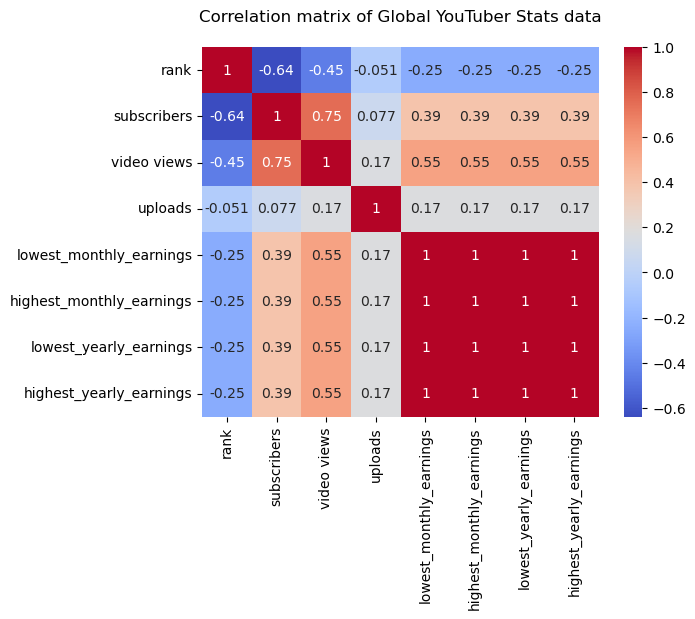

<Figure size 1000x600 with 0 Axes>

In [13]:
import matplotlib.pyplot as pt 
heatmap = sns.heatmap(correlation, annot = True, cmap='coolwarm')
heatmap.set(title = "Correlation matrix of Global YouTuber Stats data\n")  
pt.figure(figsize=(10, 6))
pt.show()  

In [14]:
# didn't provide Q4, IQR, Mode, Median, lesser and greater to find extreme value
dataset.describe() 

,rank,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
count,995.00000,9.950000e+02,9.950000e+02,995.000000,995.000000,9.950000e+02,9.950000e+02,9.950000e+02
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,36886.148281,5.898078e+05,4.422574e+05,7.081814e+06
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,71858.724092,1.148622e+06,8.612161e+05,1.379704e+07
min,1.00000,1.230000e+07,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,2700.000000,4.350000e+04,3.265000e+04,5.217500e+05
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,13300.000000,2.127000e+05,1.595000e+05,2.600000e+06
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,37900.000000,6.068000e+05,4.551000e+05,7.300000e+06
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08


In [15]:
# create a custom DataFrame "uni_table" and compare with original dataset to extract various values.
uni_table = pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","Min","Max","IQR","1.5 R","Lesser","Greater"],columns=Quan)

for columnName in Quan:
    uni_table[columnName]["Mean"] = dataset[columnName].mean()
    uni_table[columnName]["Median"] = dataset[columnName].median()
    uni_table[columnName]["Mode"] = dataset[columnName].mode()[0]
    uni_table[columnName]["Q1:25%"] = np.percentile(dataset[columnName],25)
    uni_table[columnName]["Q2:50%"] = np.percentile(dataset[columnName],50)
    uni_table[columnName]["Q3:75%"] = np.percentile(dataset[columnName],75)
    uni_table[columnName]["Min"] = dataset[columnName].min()
    uni_table[columnName]["Max"] = dataset[columnName].max()
    uni_table[columnName]["IQR"] = uni_table[columnName]["Q3:75%"] - uni_table[columnName]["Q1:25%"]
    uni_table[columnName]["1.5 R"] = uni_table[columnName]["IQR"]*1.5
    uni_table[columnName]["Lesser"] = uni_table[columnName]["Q1:25%"] - uni_table[columnName]["1.5 R"]
    uni_table[columnName]["Greater"] = uni_table[columnName]["Q3:75%"] + uni_table[columnName]["1.5 R"]
uni_table

,rank,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
Mean,498.0,22982412.060302,11039537052.038191,9187.125628,36886.148281,589807.847588,442257.392533,7081813.919528
Median,498.0,17700000.0,7760819588.0,729.0,13300.0,212700.0,159500.0,2600000.0
Mode,1,12500000,0.0,0,0.0,0.0,0.0,0.0
Q1:25%,249.5,14500000.0,4288145410.0,194.5,2700.0,43500.0,32650.0,521750.0
Q2:50%,498.0,17700000.0,7760819588.0,729.0,13300.0,212700.0,159500.0,2600000.0
Q3:75%,746.5,24600000.0,13554701853.0,2667.5,37900.0,606800.0,455100.0,7300000.0
Min,1,12300000,0.0,0,0.0,0.0,0.0,0.0
Max,995,245000000,228000000000.0,301308,850900.0,13600000.0,10200000.0,163400000.0
IQR,497.0,10100000.0,9266556443.0,2473.0,35200.0,563300.0,422450.0,6778250.0
1.5 R,745.5,15150000.0,13899834664.5,3709.5,52800.0,844950.0,633675.0,10167375.0


In [16]:
# Creating this script to indentify outlier in "Min" and "Max"
Lesser = []
Greater = []
for columnName in uni_table:
    if uni_table[columnName]["Min"] < uni_table[columnName]["Lesser"]:
        Lesser.append(columnName)
    if uni_table[columnName]["Max"] > uni_table[columnName]["Greater"]:
        Greater.append(columnName)

In [17]:
Lesser # Min doesn't have outlier 

[]

In [18]:
Greater # Max has outlier

['subscribers',
 'video views',
 'uploads',
 'lowest_monthly_earnings',
 'highest_monthly_earnings',
 'lowest_yearly_earnings',
 'highest_yearly_earnings']

In [19]:
# Comparing original dataset with custom dataframe if < Lesser and replace with Lesser value.
# Comparing original dataset with custom dataframe if > Greater and replace with Greater value.
for columnName in Lesser: 
    dataset[columnName][dataset[columnName] < uni_table[columnName]["Lesser"]] = uni_table[columnName]["Lesser"] 
for columnName in Greater:
    dataset[columnName][dataset[columnName] > uni_table[columnName]["Greater"]] = uni_table[columnName]["Greater"] 

C:\Users\YAS\AppData\Local\Temp\ipykernel_8780\2993193735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnName][dataset[columnName] > uni_table[columnName]["Greater"]] = uni_table[columnName]["Greater"]
C:\Users\YAS\AppData\Local\Temp\ipykernel_8780\2993193735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnName][dataset[columnName] > uni_table[columnName]["Greater"]] = uni_table[columnName]["Greater"]
C:\Users\YAS\AppData\Local\Temp\ipykernel_8780\2993193735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

In [20]:
#once again running the custom dataframe to ensure outlier replaced with lesser and Greater value respectively. 
uni_table = pd.DataFrame(index=["Mean","Median","Mode","25%","50%","75%","Min","Max","IQR","1.5 R","Lesser","Greater"],columns=Quan)

for columnName in Quan:
    uni_table[columnName]["Mean"] = dataset[columnName].mean()
    uni_table[columnName]["Median"] = dataset[columnName].median()
    uni_table[columnName]["Mode"] = dataset[columnName].mode()[0]
    uni_table[columnName]["25%"] = np.percentile(dataset[columnName],25)
    uni_table[columnName]["50%"] = np.percentile(dataset[columnName],50)
    uni_table[columnName]["75%"] = np.percentile(dataset[columnName],75)
    uni_table[columnName]["Min"] = dataset[columnName].min()
    uni_table[columnName]["Max"] = dataset[columnName].max()
    uni_table[columnName]["IQR"] = uni_table[columnName]["75%"] - uni_table[columnName]["25%"]
    uni_table[columnName]["1.5 R"] = uni_table[columnName]["IQR"]*1.5
    uni_table[columnName]["Lesser"] = uni_table[columnName]["25%"] - uni_table[columnName]["1.5 R"]
    uni_table[columnName]["Greater"] = uni_table[columnName]["75%"] + uni_table[columnName]["1.5 R"]
uni_table

,rank,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
Mean,498.0,20854773.869347,9807679389.315578,1810.817085,25854.389487,413650.309899,310151.915146,4969020.075307
Median,498.0,17700000.0,7760819588.0,729.0,13300.0,212700.0,159500.0,2600000.0
Mode,1,39750000,27454536517.5,6377,0.0,1451750.0,1088775.0,17467375.0
25%,249.5,14500000.0,4288145410.0,194.5,2700.0,43500.0,32650.0,521750.0
50%,498.0,17700000.0,7760819588.0,729.0,13300.0,212700.0,159500.0,2600000.0
75%,746.5,24600000.0,13554701853.0,2667.5,37900.0,606800.0,455100.0,7300000.0
Min,1,12300000,0.0,0,0.0,0.0,0.0,0.0
Max,995,39750000,27454536517.5,6377,90700.0,1451750.0,1088775.0,17467375.0
IQR,497.0,10100000.0,9266556443.0,2473.0,35200.0,563300.0,422450.0,6778250.0
1.5 R,745.5,15150000.0,13899834664.5,3709.5,52800.0,844950.0,633675.0,10167375.0


In [21]:
Lesser = []
Greater = []
for columnName in uni_table:
    if uni_table[columnName]["Min"] < uni_table[columnName]["Lesser"]:
        Lesser.append(columnName)
    if uni_table[columnName]["Max"] > uni_table[columnName]["Greater"]:
        Greater.append(columnName)

In [22]:
Lesser

[]

In [23]:
Greater # Now no outlier present 

[]

In [24]:
# to include "Skewness","Kurtosis","Variance","Std-deviation" in the custom dataframe
uni_table = pd.DataFrame(index=["Mean","Median","Mode","25%","50%","75%","Min","Max","IQR","1.5 R","Lesser",
                                 "Greater","Skewness","Kurtosis","Variance","Std-deviation"],columns=Quan)

for columnName in Quan:
    uni_table[columnName]["Mean"] = dataset[columnName].mean()
    uni_table[columnName]["Median"] = dataset[columnName].median()
    uni_table[columnName]["Mode"] = dataset[columnName].mode()[0]
    uni_table[columnName]["25%"] = np.percentile(dataset[columnName],25)
    uni_table[columnName]["50%"] = np.percentile(dataset[columnName],50)
    uni_table[columnName]["75%"] = np.percentile(dataset[columnName],75)
    uni_table[columnName]["Min"] = dataset[columnName].min()
    uni_table[columnName]["Max"] = dataset[columnName].max()
    uni_table[columnName]["IQR"] = uni_table[columnName]["75%"] - uni_table[columnName]["25%"]
    uni_table[columnName]["1.5 R"] = uni_table[columnName]["IQR"]*1.5
    uni_table[columnName]["Lesser"] = uni_table[columnName]["25%"] - uni_table[columnName]["1.5 R"]
    uni_table[columnName]["Greater"] = uni_table[columnName]["75%"] + uni_table[columnName]["1.5 R"]
    uni_table[columnName]["Skewness"] = dataset[columnName].skew()
    uni_table[columnName]["Kurtosis"] = dataset[columnName].kurtosis()
    uni_table[columnName]["Variance"] = dataset[columnName].var()
    uni_table[columnName]["Std-deviation"] = dataset[columnName].std()
    
uni_table

,rank,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
Mean,498.0,20854773.869347,9807679389.315578,1810.817085,25854.389487,413650.309899,310151.915146,4969020.075307
Median,498.0,17700000.0,7760819588.0,729.0,13300.0,212700.0,159500.0,2600000.0
Mode,1,39750000,27454536517.5,6377,0.0,1451750.0,1088775.0,17467375.0
25%,249.5,14500000.0,4288145410.0,194.5,2700.0,43500.0,32650.0,521750.0
50%,498.0,17700000.0,7760819588.0,729.0,13300.0,212700.0,159500.0,2600000.0
75%,746.5,24600000.0,13554701853.0,2667.5,37900.0,606800.0,455100.0,7300000.0
Min,1,12300000,0.0,0,0.0,0.0,0.0,0.0
Max,995,39750000,27454536517.5,6377,90700.0,1451750.0,1088775.0,17467375.0
IQR,497.0,10100000.0,9266556443.0,2473.0,35200.0,563300.0,422450.0,6778250.0
1.5 R,745.5,15150000.0,13899834664.5,3709.5,52800.0,844950.0,633675.0,10167375.0


In [25]:
dataset["category"].value_counts()

category
Entertainment            241
Music                    202
People & Blogs           132
Gaming                    94
Comedy                    69
Film & Animation          46
NA                        46
Education                 45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: count, dtype: int64

In [26]:
dataset["category"].replace(to_replace=["NA"],value="Uncategorized",inplace=True)

In [27]:
dataset["category"].value_counts()

category
Entertainment            241
Music                    202
People & Blogs           132
Gaming                    94
Comedy                    69
Film & Animation          46
Uncategorized             46
Education                 45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Travel & Events            1
Name: count, dtype: int64

In [28]:
dataset["Country"].value_counts()

Country
United States           313
India                   168
NA                      122
Brazil                   62
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Australia                 9
Saudi Arabia              9
Ukraine                   8
United Arab Emirates      7
Germany                   6
Pakistan                  6
France                    5
Japan                     5
Turkey                    4
Sweden                    4
Vietnam                   3
Jordan                    3
Netherlands               3
Singapore                 3
Chile                     3
Egypt                     2
Ecuador                   2
Iraq                      2
Italy                     2
China                     1
Peru        

In [29]:
dataset["Country"].replace(to_replace=["NA"],value="Unknown_Country",inplace=True)

In [30]:
dataset["Country"].value_counts()

Country
United States           313
India                   168
Unknown_Country         122
Brazil                   62
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Australia                 9
Saudi Arabia              9
Ukraine                   8
United Arab Emirates      7
Germany                   6
Pakistan                  6
France                    5
Japan                     5
Turkey                    4
Sweden                    4
Vietnam                   3
Jordan                    3
Netherlands               3
Singapore                 3
Chile                     3
Egypt                     2
Ecuador                   2
Iraq                      2
Italy                     2
China                     1
Peru        

In [31]:
dataset["channel_type"].value_counts()

channel_type
Entertainment    304
Music            216
People           101
Games             98
Comedy            51
Education         49
Film              42
Howto             36
News              30
NA                30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: count, dtype: int64

In [32]:
dataset["channel_type"].replace(to_replace=["NA"],value="Unknown_channel_type",inplace=True)

In [33]:
dataset["channel_type"].value_counts()

channel_type
Entertainment           304
Music                   216
People                  101
Games                    98
Comedy                   51
Education                49
Film                     42
Howto                    36
News                     30
Unknown_channel_type     30
Tech                     17
Sports                   13
Autos                     3
Animals                   3
Nonprofit                 2
Name: count, dtype: int64

In [34]:
dataset["video_views_rank"]

0            1.0
1      4055159.0
2           48.0
3            2.0
4            3.0
         ...    
990        525.0
991       6141.0
992     129005.0
993      35112.0
994       4568.0
Name: video_views_rank, Length: 995, dtype: object

In [35]:
dataset["video_views_rank"].replace(to_replace=["NA"],value=0,inplace = True)

In [36]:
dataset["country_rank"].value_counts()

country_rank
NA        116
1.0        43
2.0        30
3.0        26
5.0        19
         ... 
56.0        1
1874.0      1
7700.0      1
136.0       1
867.0       1
Name: count, Length: 247, dtype: int64

In [37]:
dataset["country_rank"].replace(to_replace=["NA"],value=0,inplace = True)

In [38]:
dataset["channel_type_rank"].replace(to_replace=["NA"],value=0,inplace = True)

In [39]:
dataset["video_views_for_the_last_30_days"].replace(to_replace=["NA"],value=0,inplace = True)

In [40]:
dataset["subscribers_for_last_30_days"].replace(to_replace=["NA"],value=0,inplace = True)  #value_counts()

In [41]:
dataset["created_year"].replace(to_replace=["NA"],value=0,inplace = True)

In [42]:
dataset["created_date"].replace(to_replace=["NA"],value=0,inplace = True)

In [43]:
dataset["Gross tertiary education enrollment (%)"].replace(to_replace=["NA"],value=0,inplace = True)

In [44]:
dataset["Population"].replace(to_replace=["NA"],value=0,inplace = True)

In [45]:
dataset["Unemployment rate"].replace(to_replace=["NA"],value=0,inplace = True)

In [46]:
dataset["Urban_population"].replace(to_replace=["NA"],value=0,inplace = True)

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 995 non-null    object 
 5   uploads                                  995 non-null    int64  
 6   Country                                  995 non-null    object 
 7   channel_type                             995 non-null    object 
 8   video_views_rank                         995 non-null    float64
 9   country_rank                             995 non-null    float64
 10  channel_type_rank                        995 non-n

In [48]:
drop_unwanted_data = (dataset["video views"] == 0.00) | (dataset["video_views_rank"] == 0.00) |(dataset["country_rank"]== 0.00) |(dataset["uploads"] == 0)| (dataset["channel_type_rank"] == 0.00 )| (dataset["video_views_for_the_last_30_days"] == 0.00) | (dataset["lowest_monthly_earnings"] == 0.00) | (dataset["highest_monthly_earnings"] == 0.00)|(dataset["highest_yearly_earnings"] == 0.00) |(dataset["lowest_yearly_earnings"] == 0.00) | (dataset["subscribers_for_last_30_days"] == 0.00 ) |(dataset["created_year"]== 0.00) | (dataset["created_date"] == 0.00) | (dataset["Gross tertiary education enrollment (%)"] == 0.00)| (dataset["Population"] == 0.00) | (dataset["Unemployment rate"] == 0.00) | (dataset["Urban_population"] == 0.00)
dataset[drop_unwanted_data]

,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,country_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,2,YouTube Movies,39750000,0.000000e+00,Film & Animation,1,United States,Games,4055159.0,7670.0,...,0.0,2006.0,Mar,5.0,88.2,328239523.0,14.70,270663028.0,37.09024,-95.712891
5,6,Music,39750000,0.000000e+00,Uncategorized,0,Unknown_Country,Music,4057944.0,0.0,...,0.0,2013.0,Sep,24.0,0.0,0.0,0.00,0.0,NA,NA
6,7,ýýý Kids Diana Show,39750000,2.745454e+10,People & Blogs,1111,United States,Entertainment,5.0,3.0,...,0.0,2015.0,May,12.0,88.2,328239523.0,14.70,270663028.0,37.09024,-95.712891
7,8,PewDiePie,39750000,2.745454e+10,Gaming,4716,Japan,Entertainment,44.0,1.0,...,0.0,2010.0,Apr,29.0,63.2,126226568.0,2.29,115782416.0,36.204824,138.252924
12,13,Gaming,39750000,0.000000e+00,Uncategorized,0,Unknown_Country,Games,4057944.0,0.0,...,0.0,2013.0,Dec,15.0,0.0,0.0,0.00,0.0,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,983,DisneyChannelUK,12400000,1.260749e+10,Music,4422,United Kingdom,Entertainment,306.0,34.0,...,0.0,2007.0,Dec,6.0,60.0,66834405.0,3.85,55908316.0,55.378051,-3.435973
983,984,MoniLina,12400000,1.608681e+10,Comedy,0,United States,People,4057944.0,2774.0,...,100.0,2016.0,May,10.0,88.2,328239523.0,14.70,270663028.0,37.09024,-95.712891
985,986,TKOR,12400000,3.392023e+09,Education,0,Unknown_Country,People,4057944.0,0.0,...,0.0,2006.0,Aug,16.0,0.0,0.0,0.00,0.0,NA,NA
986,987,ANNA KOVA,12400000,1.395959e+10,People & Blogs,1,Unknown_Country,Film,4049634.0,0.0,...,0.0,2006.0,Jun,18.0,0.0,0.0,0.00,0.0,NA,NA


In [49]:
dataset = dataset[~drop_unwanted_data]

In [50]:
dataset[['created_year','created_month','created_date']]

,created_year,created_month,created_date
0,2006.0,Mar,13.0
2,2012.0,Feb,20.0
3,2006.0,Sep,1.0
4,2006.0,Sep,20.0
8,2016.0,Jan,14.0
...,...,...,...
990,2017.0,Feb,12.0
991,2018.0,Sep,14.0
992,2006.0,Sep,11.0
993,2012.0,May,9.0


In [51]:
dataset['created_year'] = dataset['created_year'].astype('int64')
dataset['created_date'] = dataset['created_date'].astype ('int64')

In [52]:
dataset['Calculated_Date'] = dataset[['created_date','created_month','created_year']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
dataset['Calculated_Date'].head()

0    13-Mar-2006
2    20-Feb-2012
3     1-Sep-2006
4    20-Sep-2006
8    14-Jan-2016
Name: Calculated_Date, dtype: object

In [53]:
dataset.drop(['created_year','created_month','created_date'], axis =1, inplace = True)

In [54]:
dataset["Youtuber"].value_counts()

Youtuber
T-Series                                               1
Mrwhosetheboss                                         1
ýýýýýýýý ýý ýýýýýýýý                                   1
Kashvi Adlakha                                         1
ýýýýýýýý ýýýýýýýýýýýýýý ýýýý 5 ýýýýýýýýýý              1
                                                      ..
toyorbabytv                                            1
BabyBus - Canciones Infantiles & Videos para Niï¿½ï    1
Vania Mania Kids                                       1
Sun TV                                                 1
Make Joke Of                                           1
Name: count, Length: 575, dtype: int64

In [55]:
dataset["Youtuber"].replace(to_replace=["Vocï¿½ï¿½ï¿½"],value="Voc",inplace=True)
dataset["Youtuber"].replace(to_replace=["ýýýýýýýý ýýýý ýýýýýýýýýýýýýý","ýýýýýýýýýýýýýýýýýý","ýýýýýýýý ýý ýýýýýýýýýýýý","ýýýýýýýýýýýý","ýýýýýýýýýýýýýýýýýýýýý","ýýýýýýýý ýýýýýýýýýýýýýý ýýýý 5 ýýýýýýýýýý","ýýýýýýýý ýý ýýýýýýýý","ýýýýýýýý ýýýýýýýýýýýýýýýýýýýýýý","ýýýýýýýýýýýýýýýýýýýýýý","ýýýýýýýý ýý ýýýýýýýýýýýýýý","ýýýýýýýýýýýýýýý ýýýýýý ýýýýýýýýýýýýýýýýýý","ýýýýýýýýýýýýýý ýýýý"],value="Unknow_youtuber",inplace=True)
dataset["Youtuber"].replace(to_replace=["shfa2 - ï¿½ï¿½"],value="shfa2",inplace=True)
dataset["Youtuber"].replace(to_replace=["XXXTENTACION"],value="TENTACION",inplace=True)
dataset["Youtuber"].replace(to_replace=["Vlad vï¿½ï¿½ï"],value="Vlad",inplace=True)
dataset["Youtuber"].replace(to_replace=["ýýýýýýýýýýýý one31"],value="One31",inplace=True)
dataset["Youtuber"].replace(to_replace=["La Granja de Zenï¿½"],value="La Granja de Zen",inplace=True)
dataset["Youtuber"].replace(to_replace=["BETER Bï¿½ï¿½"],value="BETER Bi",inplace=True)
dataset["Youtuber"].replace(to_replace=["ýýýýýýýý ýýýýýýýý ýýýýýýýýýý | toyoraljanahtv"],value="Toyoraljanahtv",inplace=True)
dataset["Youtuber"].replace(to_replace=["ýýý Kids Roma Show"],value="Kids Roma Show",inplace=True)
dataset["Youtuber"].replace(to_replace=["Junya.ï¿½ï¿½ï¿½ï¿½"],value="Junya",inplace=True)
dataset["Youtuber"].replace(to_replace=["MrBeast en Espaï¿½ï"],value="MrBeast en Espai",inplace=True)
dataset["Youtuber"].replace(to_replace=["netd mï¿½ï¿"],value="netd mi",inplace=True)
dataset["Youtuber"].replace(to_replace=["Peppa Pig Espaï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½"],value="Peppa Pig Espai",inplace=True)
dataset["Youtuber"].replace(to_replace=["BabyBus - Canciones Infantiles & Videos para Niï¿½ï"],value="BabyBus - Canciones Infantiles & Videos para Ni",inplace=True)
dataset["Youtuber"].replace(to_replace=["Sagawa /ï¿½ï¿½ï¿½"],value="Sagawa",inplace=True)
dataset["Youtuber"].replace(to_replace=["Kurzgesagt ï¿½ï¿½ï¿½ï¿½ï¿½ï¿"],value="Kurzgesagt",inplace=True)
dataset["Youtuber"].replace(to_replace=["Totoy kids - Portuguï¿½"],value="Totoy kids - Portugui",inplace=True)
dataset["Youtuber"].replace(to_replace=["ýýýýýýýý ýýýýýýýýýý ýýýýýýýýýý | Arab Games Network"],value="Arab Games Network",inplace=True)
dataset["Youtuber"].replace(to_replace=["Turma da Mï¿½ï¿½"],value="Turma da Mi",inplace=True)
dataset["Youtuber"].replace(to_replace=["RsiamMusic : ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½"],value="RsiamMusic",inplace=True)
dataset["Youtuber"].replace(to_replace=["ýýýýýýýýý KIMPRO"],value="KIMPRO",inplace=True)
dataset["Youtuber"].replace(to_replace=["ýýýýýýýýý Liziqi"],value="Liziqi",inplace=True)
dataset["Youtuber"].replace(to_replace=["AMARINTV : ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½"],value="AMARINTV",inplace=True)
dataset["Youtuber"].replace(to_replace=["Gato Galactico | GALï¿½ï¿"],value="Gato Galactico",inplace=True)
dataset["Youtuber"].replace(to_replace=["With Kids[ï¿½ï¿½ï¿½ï¿½ï"],value="With Kids",inplace=True)
dataset["Youtuber"].replace(to_replace=["GMMTV OFFICIALï¿½ï¿½"],value="GMMTV OFFICIAL",inplace=True)
dataset["Youtuber"].replace(to_replace=["Totoy kids - Espaï¿½ï"],value="Totoy kids - Espai",inplace=True)
dataset["Youtuber"].replace(to_replace=["Pokï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½"],value="Poki",inplace=True)
dataset["Youtuber"].replace(to_replace=["Mohamed Ramadan I ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï"],value="Mohamed Ramadan",inplace=True)
dataset["Youtuber"].replace(to_replace=["Rubï¿½ï¿½ï¿½ï¿½ï¿½ï¿½"],value="Rubi",inplace=True)
dataset["Youtuber"].replace(to_replace=["ISSEI / ï¿½ï¿½ï¿½ï¿½"],value="ISSEI",inplace=True)
dataset["Youtuber"].replace(to_replace=["iTownGamePlay *Terror&Diversiï¿½ï"],value="iTownGamePlayTerror&Diversi",inplace=True)
dataset["Youtuber"].replace(to_replace=["ýýýýýýýýýýýý8 : Thai Ch8"],value="Thai Ch8",inplace=True)
dataset["Youtuber"].replace(to_replace=["Gyan Gamingï¿½"],value="Gyan Gaming",inplace=True)
dataset["Youtuber"].replace(to_replace=["Luli Pampï¿½"],value="Luli Pampi",inplace=True)
dataset["Youtuber"].replace(to_replace=["ýýýýýýýý/Atro"],value="Atro",inplace=True)
dataset["Youtuber"].replace(to_replace=["O Que Nï¿½ï¿½ï¿½ï¿½ï¿½ï¿"],value="O Que Ni",inplace=True)
dataset["Youtuber"].replace(to_replace=["Kids Lineï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½"],value="Kids Line",inplace=True)
dataset["Youtuber"].replace(to_replace=["BIBO ï¿½ï¿½ï¿½ï¿½ï¿½ï¿"],value="BIBO",inplace=True)
dataset["Youtuber"].replace(to_replace=["ýýýýýýTwinsFromRussia"],value="TwinsFromRussia",inplace=True)
dataset["Youtuber"].replace(to_replace=["HUBAï¿½ï¿½"],value="HUBAi",inplace=True)
dataset["Youtuber"].replace(to_replace=["Peppa Pig em Portuguï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿"],value="Peppa Pig em Portugui",inplace=True)
dataset["Youtuber"].replace(to_replace=["ýýýýýýýýýýýýýýý Ms Yeah"],value="Ms Yeah",inplace=True)
dataset["Youtuber"].replace(to_replace=["Pastor Antï¿½ï¿½ï¿½ï¿½ï"],value="Pastor",inplace=True)
dataset["Youtuber"].replace(to_replace=["AlArabiya ï¿½ï¿½ï¿½ï¿½ï¿"],value="AlArabiya",inplace=True)
dataset["Youtuber"].replace(to_replace=["ýýýýýýýýýSULGI"],value="SULGI",inplace=True)
dataset["Youtuber"].replace(to_replace=["_vector_"],value="vector",inplace=True)
dataset["Youtuber"].replace(to_replace=["DONA ï¿½ï¿½"],value="DONA",inplace=True)
dataset["Youtuber"].replace(to_replace=["Natan por Aï¿"],value="Natan por",inplace=True)
dataset["Youtuber"].replace(to_replace=["DaniRep | +6 Vï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï"],value="DaniRep",inplace=True)

In [56]:
dataset

,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,country_rank,...,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Calculated_Date
0,1,T-Series,39750000,2.745454e+10,Music,6377,India,Music,1.0,1.0,...,1088775.0,17467375.0,2000000.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.96288,13-Mar-2006
2,3,MrBeast,39750000,2.745454e+10,Entertainment,741,United States,Entertainment,48.0,1.0,...,1088775.0,17467375.0,8000000.0,88.2,3.282395e+08,14.70,270663028.0,37.09024,-95.712891,20-Feb-2012
3,4,Cocomelon - Nursery Rhymes,39750000,2.745454e+10,Education,966,United States,Education,2.0,2.0,...,1088775.0,17467375.0,1000000.0,88.2,3.282395e+08,14.70,270663028.0,37.09024,-95.712891,1-Sep-2006
4,5,SET India,39750000,2.745454e+10,Shows,6377,India,Entertainment,3.0,2.0,...,1088775.0,17467375.0,1000000.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.96288,20-Sep-2006
8,9,Like Nastya,39750000,2.745454e+10,People & Blogs,493,Russia,People,630.0,5.0,...,146800.0,2300000.0,100000.0,81.9,1.443735e+08,4.59,107683889.0,61.52401,105.318756,14-Jan-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por,12300000,9.029610e+09,Sports,1200,Brazil,Entertainment,525.0,55.0,...,1088775.0,17467375.0,700000.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.92528,12-Feb-2017
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,1500,India,Games,6141.0,125.0,...,194200.0,3100000.0,300000.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.96288,14-Sep-2018
992,993,Panda,12300000,2.214684e+09,Uncategorized,2452,United Kingdom,Games,129005.0,867.0,...,201.0,3200.0,1000.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973,11-Sep-2006
993,994,RobTopGames,12300000,3.741235e+08,Gaming,39,Sweden,Games,35112.0,4.0,...,11600.0,185800.0,100000.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501,9-May-2012


In [57]:
dataset["Calculated_Date"].head()

0    13-Mar-2006
2    20-Feb-2012
3     1-Sep-2006
4    20-Sep-2006
8    14-Jan-2016
Name: Calculated_Date, dtype: object

In [58]:
dataset['Calculated_Date'] = pd.to_datetime(dataset['Calculated_Date'])

# Specify the reference date (e.g., today's date)
reference_date = pd.to_datetime("2023-09-23")

# Calculate age by subtracting the reference date from the 'Calculated_Date' column
ages_in_days = (reference_date - dataset['Calculated_Date']).dt.days

# Calculate age in years by dividing by the number of days in a year
dataset['Age_of_Youtuber'] = ages_in_days // 365
dataset

,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,country_rank,...,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Calculated_Date,Age_of_Youtuber
0,1,T-Series,39750000,2.745454e+10,Music,6377,India,Music,1.0,1.0,...,17467375.0,2000000.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.96288,2006-03-13,17
2,3,MrBeast,39750000,2.745454e+10,Entertainment,741,United States,Entertainment,48.0,1.0,...,17467375.0,8000000.0,88.2,3.282395e+08,14.70,270663028.0,37.09024,-95.712891,2012-02-20,11
3,4,Cocomelon - Nursery Rhymes,39750000,2.745454e+10,Education,966,United States,Education,2.0,2.0,...,17467375.0,1000000.0,88.2,3.282395e+08,14.70,270663028.0,37.09024,-95.712891,2006-09-01,17
4,5,SET India,39750000,2.745454e+10,Shows,6377,India,Entertainment,3.0,2.0,...,17467375.0,1000000.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.96288,2006-09-20,17
8,9,Like Nastya,39750000,2.745454e+10,People & Blogs,493,Russia,People,630.0,5.0,...,2300000.0,100000.0,81.9,1.443735e+08,4.59,107683889.0,61.52401,105.318756,2016-01-14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por,12300000,9.029610e+09,Sports,1200,Brazil,Entertainment,525.0,55.0,...,17467375.0,700000.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.92528,2017-02-12,6
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,1500,India,Games,6141.0,125.0,...,3100000.0,300000.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.96288,2018-09-14,5
992,993,Panda,12300000,2.214684e+09,Uncategorized,2452,United Kingdom,Games,129005.0,867.0,...,3200.0,1000.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973,2006-09-11,17
993,994,RobTopGames,12300000,3.741235e+08,Gaming,39,Sweden,Games,35112.0,4.0,...,185800.0,100000.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501,2012-05-09,11


In [75]:
dataset.to_csv("preprocessed_data.csv",index=False)